Random Forest Model

In [7]:
# Import statements
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Training Accuracy: 1.0000
Test Accuracy: 0.9964
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554

Cross-validation Accuracy: 0.9928 ± 0.0091


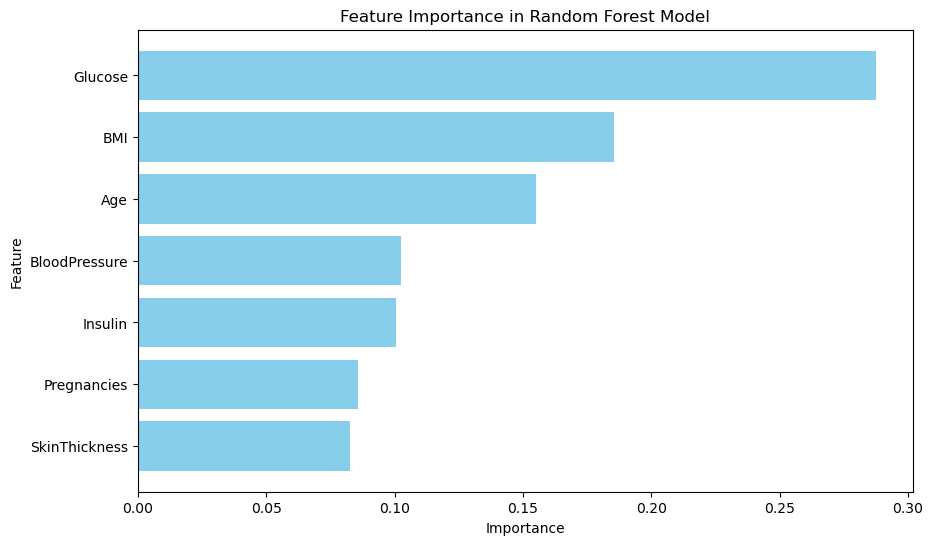

In [ ]:
# Load preprocessed dataset
file_path = "healthcare_diabetes_preprocessed.csv"
df = pd.read_csv(file_path)

# Separate features and target variable
X = df.drop(columns=['Outcome', 'DiabetesPedigreeFunction'])
y = df['Outcome']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save trained model
joblib.dump(model, "random_forest_model.pkl")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Visualize Feature Importances
plt.figure(figsize=(10,6))
plt.barh([feature_names[idx] for idx in sorted_indices], importances[sorted_indices], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring="accuracy")

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", marker='o')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score", marker='s')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()